In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,Normalizer
import numpy as np
import csv,os
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\subhajit.choudhury\Desktop\machine learning\kaggle\titanic\train.csv')
testdf = pd.read_csv(r'C:\Users\subhajit.choudhury\Desktop\machine learning\kaggle\titanic\test.csv')
predictionsfile = r'C:\Users\subhajit.choudhury\Desktop\machine learning\kaggle\titanic\submission_3.csv'

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#df[df['Survived']==1]

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.dropna(subset=['Embarked'])
le= LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
#df['Cabin'] = le.fit_transform(df['Cabin'].astype(str))
df['Embarked'] = le.fit_transform(df['Embarked'])
df.Age.fillna(df.Age.mean(),inplace=True)
df = df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


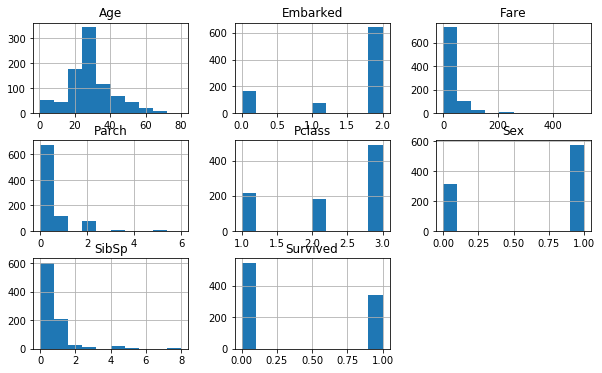

In [9]:
#plt.figure(figsize=(3,4))
df.hist(figsize=(10,6))
plt.show()
# df.boxplot()
# plt.show()

In [10]:
# class_cols = list(df.drop(['Survived','Age','Fare'],axis=1).columns)
# cont_cols = ['Age','Fare']

In [11]:
# for col in class_cols:
#     df.groupby(['Survived',col]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,2))

In [12]:
# fig, ax = plt.subplots()
# df.plot.scatter('Fare','Age',c='Survived',colormap='Spectral',figsize=(15,3),ax = ax)
# plt.show()

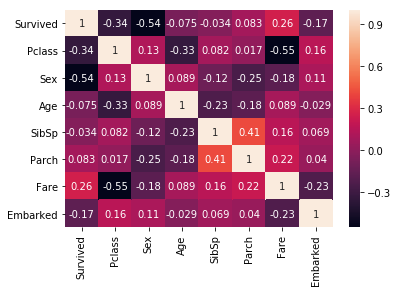

In [13]:
corr = df.corr()
# plt.figure(figsize=(20,10))
# plt.matshow(corr)
# plt.xticks(range(len(corr.columns)), corr.columns);
# plt.yticks(range(len(corr.columns)), corr.columns);
# plt.show()
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [15]:
# scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
# scaler = Normalizer()
x_scaled = scaler.fit_transform(x)

In [16]:
knn=KNeighborsClassifier()
k_range = range(1,31)
weight_options = ["uniform","distance"]

In [17]:
param_grid = dict(n_neighbors=k_range, weights = weight_options)
grid = GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
grid.fit(x_scaled,y)
#print(grid.grid_scores_)
print(grid.best_score_)
print(grid.best_params_)

0.8188976377952756
{'n_neighbors': 16, 'weights': 'uniform'}


In [18]:
param_dist = dict(n_neighbors=k_range, weights = weight_options)
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring = "accuracy", n_iter = 10, random_state = 5)
rand.fit(x_scaled,y)
print(rand.best_score_)
print(rand.best_params_)

0.8177727784026997
{'weights': 'uniform', 'n_neighbors': 15}


In [19]:
knn=KNeighborsClassifier(n_neighbors=16, weights = 'uniform')
knn.fit(x_scaled,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

In [20]:
testdf_bck = testdf
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
passengerlist = testdf.PassengerId
#testdf = testdf.dropna(subset=['Embarked'])
#testdf = testdf.dropna(subset=['Fare'])
le= LabelEncoder()
testdf['Sex'] = le.fit_transform(testdf['Sex'])
#testdf['Cabin'] = le.fit_transform(testdf['Cabin'].astype(str))
testdf['Embarked'] = le.fit_transform(testdf['Embarked'])
testdf.Age.fillna(testdf.Age.mean(),inplace=True)
testdf.Fare.fillna(testdf.Fare.mean(),inplace=True)
testdf = testdf.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [23]:
testdf_scaled = scaler.fit_transform(testdf)
predictions = knn.predict(testdf_scaled)

In [24]:
with open(predictionsfile,'w') as writefile:
    writer = csv.writer(writefile)
    writer.writerow(['PassengerId','Survived'])
    for i in range(len(passengerlist)):
        row = [passengerlist[i],predictions[i]]
        writer.writerow(row)

In [25]:
testdf['Survived'] = predictions

In [26]:
df.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,549,549,549,549,549,549,549
1,340,340,340,340,340,340,340


In [27]:
testdf.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,276,276,276,276,276,276,276
1,142,142,142,142,142,142,142


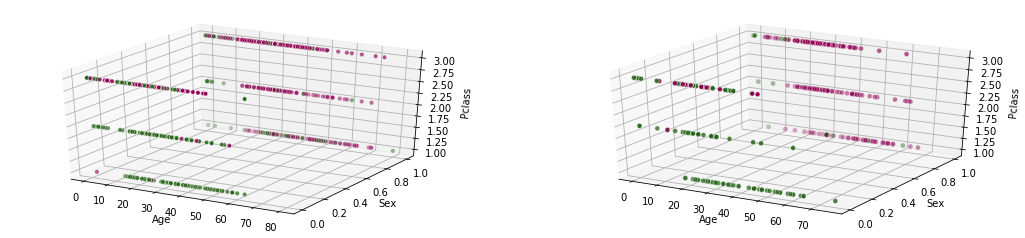

In [28]:
# fig, ax = plt.subplots()
# df.plot.scatter('Age','Sex',c='Survived',colormap='coolwarm',figsize=(20,2), ax = ax)
# plt.show()
fig = plt.figure(figsize=(18,4))
#fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(df.Age, df.Sex, df.Pclass, c=df.Survived, cmap='PiYG', linewidth=0.5, s=20, edgecolors='w')
ax.set_xlabel('Age')
ax.set_ylabel('Sex')
ax.set_zlabel('Pclass')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(testdf.Age, testdf.Sex, testdf.Pclass, c=testdf.Survived, cmap='PiYG', linewidth=0.5, s=25, edgecolors='w')
ax.set_xlabel('Age')
ax.set_ylabel('Sex')
ax.set_zlabel('Pclass')
plt.show()

In [29]:
# fig, ax = plt.subplots()
# testdf.plot.scatter('Age','Sex',c='Survived',colormap='coolwarm',figsize=(20,2), ax = ax)
# plt.show()

In [30]:
testdf['Name'] = testdf_bck['Name']
testdf[testdf['Survived']==1]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Name
6,3,0,30.00000,0,0,7.6292,1,1,"Connolly, Miss. Kate"
8,3,0,18.00000,0,0,7.2292,0,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)"
12,1,0,23.00000,1,0,82.2667,2,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)"
14,1,0,47.00000,1,0,61.1750,2,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance..."
15,2,0,24.00000,1,0,27.7208,0,1,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)"
19,3,0,45.00000,0,0,7.2250,0,1,"Assaf Khalil, Mrs. Mariana (Miriam"")"""
22,1,0,30.27259,0,0,31.6833,2,1,"Flegenheim, Mrs. Alfred (Antoinette)"
24,1,0,48.00000,1,3,262.3750,0,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)"
26,1,0,22.00000,0,1,61.9792,0,1,"Ostby, Miss. Helene Ragnhild"
33,3,0,30.27259,1,2,23.4500,2,1,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)"""
